# Reducción de dimensionalidad

In [1]:
%matplotlib inline
from DSM import dsm
import numpy as np

In [2]:
sentences = ['Juan come sushi','Pedro come unos tacos','Juan prepara tacos','Pedro prepara sushi']

In [3]:
A, voc = dsm(sentences)
print A

[[ 0.  1.  1.  0.  0.  1.  1.]
 [ 1.  0.  1.  1.  1.  1.  0.]
 [ 1.  1.  0.  1.  0.  0.  1.]
 [ 0.  1.  1.  0.  1.  1.  1.]
 [ 0.  1.  0.  1.  0.  1.  0.]
 [ 1.  1.  0.  1.  1.  0.  1.]
 [ 1.  0.  1.  1.  0.  1.  0.]]


In [4]:
Q,S,D = np.linalg.svd(A)
print S

[  4.37228132e+00   2.00000000e+00   2.00000000e+00   1.37228132e+00
   1.00000000e+00   3.65060341e-16   1.06209955e-16]


In [5]:
k = 2
Q = Q[:,:k]
S = np.diag(S)[:k,:k]
print S

[[ 4.37228132  0.        ]
 [ 0.          2.        ]]


In [6]:
B = np.zeros((len(voc.keys()),k))
for i,w in enumerate(A):
    B[i] = np.dot(np.linalg.inv(S),np.dot(Q.T,w))
    
print B

[[ -3.56163933e-01  -5.77350269e-01]
 [ -4.22460523e-01   2.88675135e-01]
 [ -3.56163933e-01   2.88675135e-01]
 [ -4.22460523e-01  -5.77350269e-01]
 [ -2.89867343e-01   1.66533454e-16]
 [ -4.22460523e-01   2.88675135e-01]
 [ -3.56163933e-01   2.88675135e-01]]


In [7]:
print A[voc["Juan"]]

print B[voc["Juan"]]

[ 0.  1.  1.  0.  0.  1.  1.]
[-0.35616393 -0.57735027]


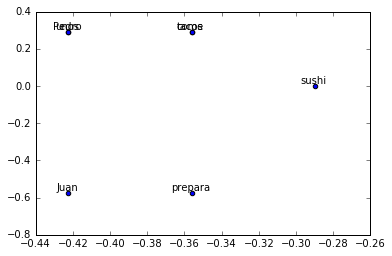

In [9]:
def plot_words(Z,ids):
    import matplotlib.pyplot as plt
    r=0
    plt.scatter(Z[:,0],Z[:,1], marker='o', c='blue')
    for label,x,y in zip(ids, Z[:,0], Z[:,1]):
        plt.annotate(label.decode('utf8'), xy=(x,y), xytext=(-1,1), textcoords='offset points', ha='center', va='bottom')
        r+=1
    plt.show()

plot_words(B,voc.keys())